In [31]:
# load packages
from pandas import read_csv
from matplotlib import pyplot 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [32]:
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = read_csv(url, names=names)

In [33]:
# shape
print(dataset.shape)

(150, 5)


In [34]:
# preview data
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [35]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


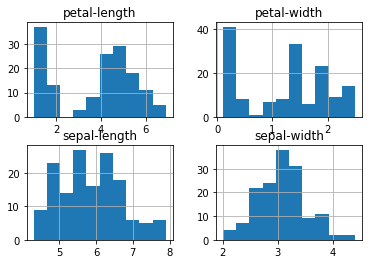

In [36]:
dataset.hist()
pyplot.show()

In [37]:
# split data
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y,test_size=0.2,random_state = 1)

In [38]:
# compare different models
models = []
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))

In [40]:
# evaluate models
results = []
names = []
for name, model in models: 
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_results.mean(), cv_results.std()))

KNN: 0.958333 (0.041667)
SVM: 0.983333 (0.033333)
LR: 0.941667 (0.065085)


In [41]:
# make predictions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [42]:
# evaluate predictions
print(accuracy_score(Y_validation, predictions))

0.9666666666666667
